Grupo 4: Ana Carolina Galindo, Cíntia Dantas, Enzo dos Santos, Gabriel Mariusso e Júlia Cavalcante

### Atividade

Para resolver as questões abaixo utilizar o dataset Titanic.

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
# Verifica os datasets da biblioteca seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
# Escolhe dataset
titanic = sns.load_dataset('titanic')

In [6]:
# Explora informações básicas do dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Questão 1 - Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset.

In [7]:
# Mostra as cidades de embarque do dataset
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [8]:
# Conta quantos passageiros vêm de cada cidade
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

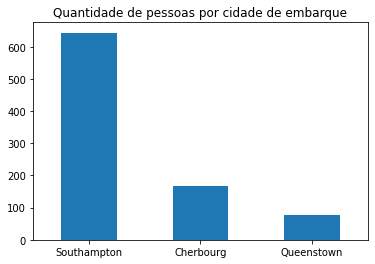

In [9]:
# Gera um gráfico de barras da quantidade de pessoas por cidade de embarque
q1 = titanic['embark_town'].value_counts().plot.bar(rot=0)
q1.set_title('Quantidade de pessoas por cidade de embarque');

Questão 2 - Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset separados pelo sexo, coluna sex no dataset.

In [10]:
# Cria variáveis dummies para sexo male e female
q2 = pd.get_dummies(titanic, columns=['sex'])
q2.head(3)

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,1
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,0


In [11]:
# Verifica a quantidade de passageiros de cada sexo por cidade de embarque
q2[['embark_town', 'sex_female', 'sex_male']].groupby('embark_town').value_counts()

embark_town  sex_female  sex_male
Cherbourg    0           1            95
             1           0            73
Queenstown   0           1            41
             1           0            36
Southampton  0           1           441
             1           0           203
dtype: int64

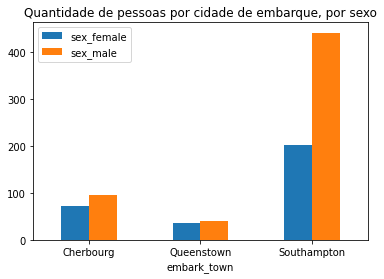

In [12]:
# Agrupa o dataset pelas variáveis criadas e plota o gráfico de barras
q2_1 = q2.groupby('embark_town')[['sex_female', 'sex_male']].sum().plot.bar(rot=0)
q2_1.set_title('Quantidade de pessoas por cidade de embarque, por sexo');

Questão 3 - Criar um gráfico com a biblioteca Pandas que mostre o percentual pelo sexo das pessoas no Titanic.

In [13]:
# Verifica a quantidade de passageiros por sexo, aproveitando as variáveis dummies feitas na questão anterior
q3 =  q2[['sex_female', 'sex_male']].sum()
q3

sex_female    314
sex_male      577
dtype: int64

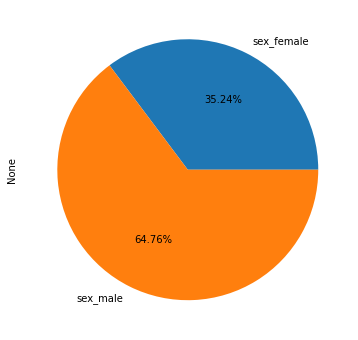

In [14]:
# Agrupa os passageiros por sexo e plota um gráfico de pizza, com o porcentual de cada sexo
pd.get_dummies(titanic, columns=['sex'])[['sex_female', 'sex_male']].sum() \
  .plot.pie(figsize=(16,6), autopct='%.2f%%');

Questão 4 - Criar um gráfico com a biblioteca Pandas que mostre os outliers da idade das pessoas no Titanic, coluna age no dataset.

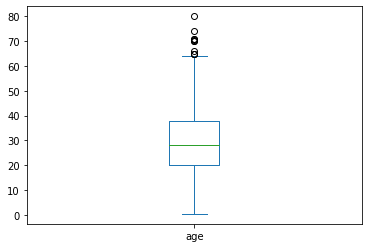

In [15]:
# Plota um boxplot para a idade; os outliers são os círculos da parte de cima do gráfico
titanic['age'].plot(kind='box');

Questão 5 - Criar um gráfico com a biblioteca Pandas que mostre os outliers da tarifa de embarque das pessoas no Titanic, coluna fare no dataset.

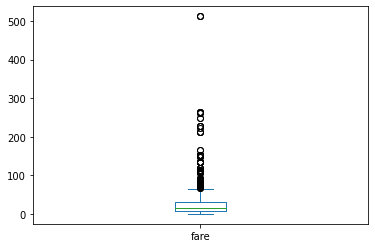

In [16]:
# Plota um boxplot para a tarifa; os outliers são os círculos da parte de cima e meio do gráfico
titanic['fare'].plot(kind='box');

Questão 6 - Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset.

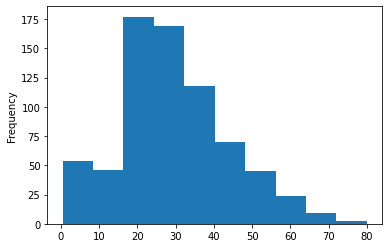

In [17]:
# Plota um histograma com a distribuição das idades
titanic['age'].plot(kind='hist');

Questão 7 - Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset separados por sexo em dois gráficos.

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

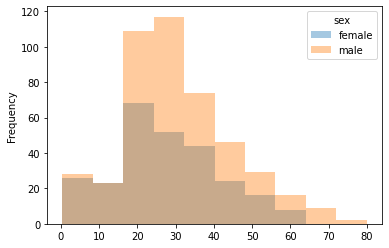

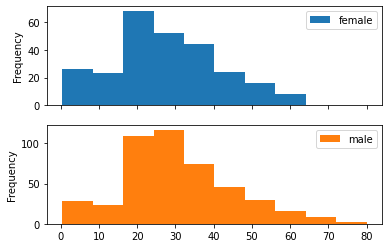

In [20]:
# titanic[['sex', 'age']].reset_index().pivot('index', 'sex', 'age').plot.hist(alpha=0.4)
titanic[['sex', 'age']].reset_index().pivot('index', 'sex', 'age').plot.hist(subplots=True)